In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
data=pd.read_csv('car_age_price.csv')

In [3]:
#to know the data structure
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
#checking for null values
data.isna().sum()

Year     0
Price    0
dtype: int64

<AxesSubplot:>

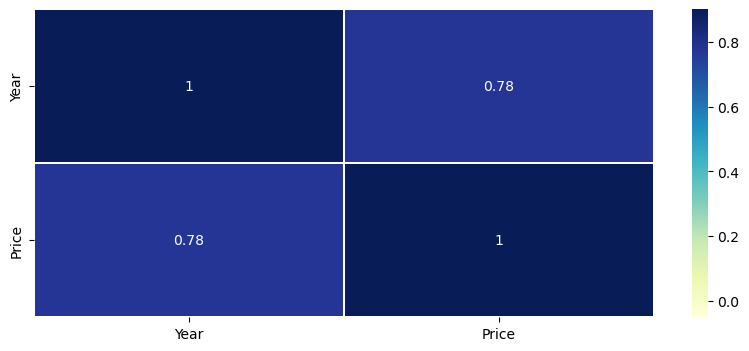

In [5]:
#plotting the correlation and heatmap
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-0.05,vmax=0.9,linewidth=0.3,cmap='YlGnBu')

Inference: The heatmap shows that the price and year are highly positively correlated. it implies there exist a linear relationship between the year and price.

# Linear Regression

In [6]:
#assigining the target and predict values.
y=data['Price']
x=data.drop(['Price'],axis=1)

In [7]:
#split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [8]:
#performing Linear Regression
from sklearn import linear_model

# Create an instance of Linear Regression implementation
lr=linear_model.LinearRegression()

In [9]:
#fit the regression model
model = lr.fit(x_train,y_train)

In [10]:
y_pred = model.predict(x_test)

In [11]:
#finding metric MSE for the Linear regression model
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for Linear Regression model = ',mean_squared_error(y_test,y_pred))

#finding metric r2 score
from sklearn.metrics import r2_score
r2_linear = r2_score(y_test, y_pred)
print('R-squared Score for Linear Regression model = ',r2_score(y_test,y_pred))

Mean Squared Error for Linear Regression model =  3878767151.073449
R-squared Score for Linear Regression model =  0.4347961632108023


# Lasso Regression

In [12]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [13]:
# Fit the Lasso model
lasso.fit(x_train, y_train)

Lasso()

In [14]:
# Make predictions using the Lasso regression model
y_pred_lasso = lasso.predict(x_test)

In [15]:
# Calculate the mean squared error and R-squared score for the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [16]:
# Print the results for the Lasso regression model
print('Mean Squared Error for Lasso Regression model :', mse_lasso)
print('R-squared Score for Lasso Regression model :', r2_lasso)

Mean Squared Error for Lasso Regression model : 3878735896.222091
R-squared Score for Lasso Regression model : 0.4348007175862566


# Predicting the possible price of a 2022 model second-hand grand i10

In [17]:
#Using linear regression
year = 2022
price_pred_lr = lr.predict([[year]])
print('Predicted Price (Linear Regression):', price_pred_lr[0])

Predicted Price (Linear Regression): 740160.1193776578


C:\Users\rejoj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
#Using Lasso regression
price_pred_lasso = lasso.predict([[year]])
print('Predicted Price (Lasso Regression):', price_pred_lasso[0])

Predicted Price (Lasso Regression): 740157.9570014179


C:\Users\rejoj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [19]:
#compare the r^2 values
if r2_linear > r2_lasso:
    print("Linear Regression is performing better with an R-squared value of:", r2_linear)
else:
    print("Lasso regression is performing better with an R-squared value of:", r2_lasso)

Lasso regression is performing better with an R-squared value of: 0.4348007175862566
